PROJECT

On-demand 
Исследование каналов привлечения



ЗАДАНИЕ

1/ Оценить количество ботов, которые заходят на наш сайт, и их долю от всего трафика.
2/ Определить, с каких источников и в какое время суток чаще всего заходят роботы.

Роботами могут быть пауки поисковых систем, которые индексируют контент блога, или же различные парсеры и агрегаторы контента. 
Яндекс.Метрика позволяет находить этих роботов и показывает их в отдельном параметрe ym:s:isRobot, а также считает их долю в специальной метрике ym:s:robotPercentage.

ИСХОДНЫЕ ДАННЫЕ

Идентификатор счётчика Яндекс.Метрики сайта: 30177909

токен и ID счетчика
token = 'y0_8888888888888888888'
counter_id = 30177909

URL и параметры запроса
url = 'https://api-metrika.yandex.net/st///////'
headers = {'Authorization': 'OAuth ' + token}


Разбьем задачу на подзадачи:


1. Оценка количества ботов и их доли от всего трафика

Подзадачи:

1.1. Получить данные о посещениях сайта.

1.2. Выделить метрику ym:s для определения ботов.

1.3. Вычислить долю ботов от всего трафика (метрика ym:s).

Ожидаемый результат:

Доля ботов среди всех посещений сайта в процентах.
Общее количество ботов, посещающих сайт.


2. Определение источников и времени суток, когда чаще всего заходят роботы

Подзадачи:

2.1. Собрать данные по источникам трафика (dimensions: ym:s).

2.2. Определить временные метки посещений (dimensions: ym:s).

2.3. Сопоставить данные с метрикой ym:s для идентификации бот-трафика.

2.4. Проанализировать распределение ботов по источникам трафика и времени суток.

Ожидаемый результат:

Источники трафика, наиболее часто используемые ботами.
Время суток, когда наблюдается наибольшая активность ботов.



In [5]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Токен и ID счетчика
token = 'y0_8888888888888888888'
counter_id = 30177909
goal_id = 137595631

# URL и заголовки запроса
url = 'https://api-metrika.yandex.net/st///////'
headers = {'Authorization': 'OAuth ' + token}

# Параметры запроса для оценки количества ботов
params_robots = {
    'metrics': 'ym:s:visits,ym:s:robotPercentage',
    'dimensions': 'ym:s:isRobot',
    'date1': '2023-01-01',
    'date2': '2023-12-31',
    'ids': counter_id,
    'accuracy': 'full',
    'limit': 100000
}

# Выполняем запрос к API Яндекс.Метрики
response = requests.get(url, params=params_robots, headers=headers)
data_robots = response.json()


In [6]:
# Преобразуем данные в DataFrame
df_robots = pd.DataFrame([{
    'isRobot': item['dimensions'][0]['name'],
    'Visits': item['metrics'][0],
    'RobotPercentage': item['metrics'][1]
} for item in data_robots['data']])
display(df_robots)

# Вычисляем долю ботов от всего трафика
total_visits = df_robots['Visits'].sum()
robot_visits = df_robots[df_robots['isRobot'] == 'Robots']['Visits'].sum()
robot_percentage = (robot_visits / total_visits) * 100

print(f"Доля ботов от всего трафика: {robot_percentage:.2f}%")

,isRobot,Visits,RobotPercentage
0,Robots,264731.0,100.0
1,People,37889.0,0.0


Доля ботов от всего трафика: 87.48%


In [7]:


# Параметры запроса для определения источников и времени суток ботов
params_sources_time = {
    'metrics': 'ym:s:visits',
    'dimensions': 'ym:s:trafficSource,ym:s:visitHour,ym:s:isRobot',
    'date1': '2023-01-01',
    'date2': '2023-12-31',
    'ids': counter_id,
    'accuracy': 'full',
    'limit': 100000
}

# Выполняем запрос к API Яндекс.Метрики
response = requests.get(url, params=params_sources_time, headers=headers)
data_sources_time = response.json()

# Преобразуем данные в DataFrame
df_sources_time = pd.DataFrame([{
    'Source': item['dimensions'][0]['name'],
    'Hour': item['dimensions'][1]['name'],
    'isRobot': item['dimensions'][2]['name'],
    'Visits': item['metrics'][0]
} for item in data_sources_time['data']])

display(df_sources_time.head())



,Source,Hour,isRobot,Visits
0,Direct traffic,04:00,Robots,11157.0
1,Direct traffic,06:00,Robots,11134.0
2,Direct traffic,03:00,Robots,10982.0
3,Direct traffic,02:00,Robots,10976.0
4,Direct traffic,05:00,Robots,10937.0


In [8]:
# Фильтруем данные для ботов
df_bots = df_sources_time[df_sources_time['isRobot'] == 'Robots']

# Анализ распределения ботов по источникам трафика
source_counts = df_bots.groupby('Source')['Visits'].sum()
print(source_counts)

# Анализ распределения ботов по времени суток
hour_counts = df_bots.groupby('Hour')['Visits'].sum().sort_index()
print(hour_counts)



Source
Ad traffic                   580.0
Cached page traffic           11.0
Direct traffic            254039.0
Internal traffic             103.0
Link traffic                 297.0
Messenger traffic              6.0
Search engine traffic       9543.0
Social network traffic       150.0
Name: Visits, dtype: float64
Hour
00:00    11155.0
01:00    10958.0
02:00    11283.0
03:00    11270.0
04:00    11423.0
05:00    11244.0
06:00    11434.0
07:00    11005.0
08:00    10983.0
09:00    10931.0
10:00    10944.0
11:00    11100.0
12:00    10901.0
13:00    10892.0
14:00    11027.0
15:00    10804.0
16:00    10736.0
17:00    10940.0
18:00    10834.0
19:00    10732.0
20:00    11113.0
21:00    11071.0
22:00    11046.0
23:00    10903.0
Name: Visits, dtype: float64


Попробуем визуализировать результат для лучшего понимания

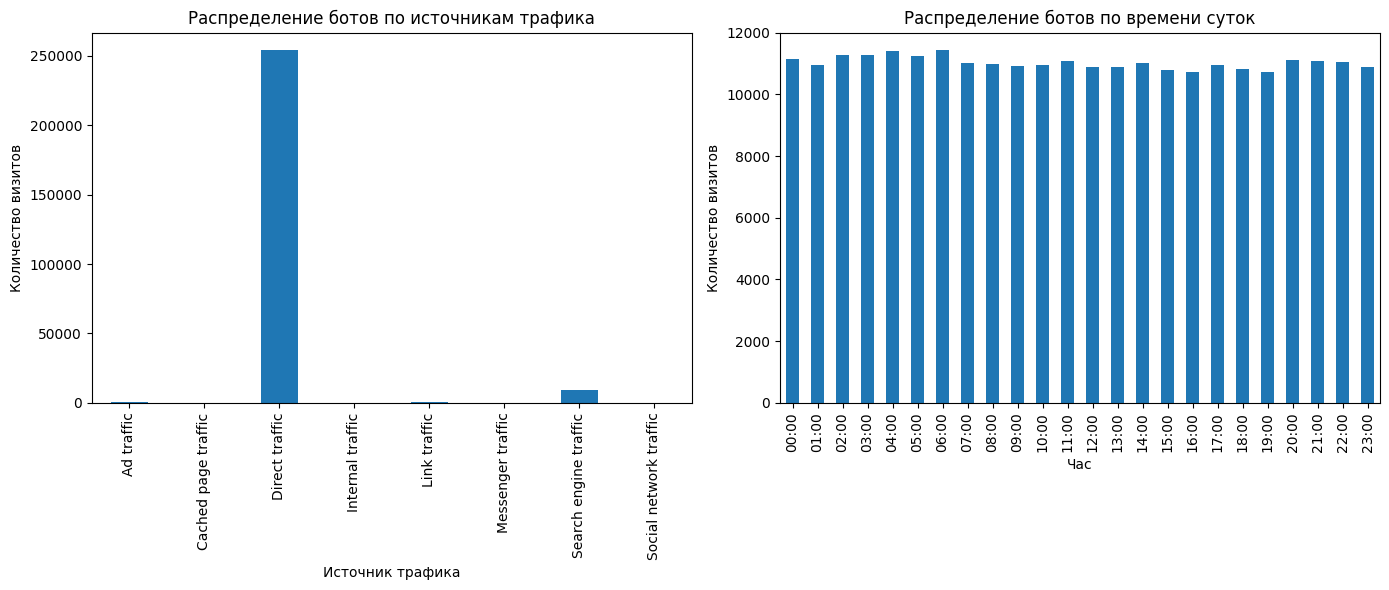

In [9]:
# Визуализация результатов
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
source_counts.plot(kind='bar')
plt.title('Распределение ботов по источникам трафика')
plt.xlabel('Источник трафика')
plt.ylabel('Количество визитов')

plt.subplot(1, 2, 2)
hour_counts.plot(kind='bar')
plt.title('Распределение ботов по времени суток')
plt.xlabel('Час')
plt.ylabel('Количество визитов')

plt.tight_layout()
plt.show()

Исходя из полученных данных о распределении ботов по источникам трафика и времени суток, можно сделать следующие выводы:

Распределение ботов по источникам трафика:

Direct traffic имеет значительное преобладание среди всех источников трафика, с 254039 визитами. Это может указывать на то, что боты часто пытаются обратиться к сайту напрямую, обходя промежуточные источники.

Search engine traffic идет следом с 9543 визитами. Это также важный аспект, так как поисковые системы часто индексируют содержимое сайта, что может привлекать ботов.

Ad traffic, Link traffic и Social network traffic имеют гораздо меньшее количество визитов от ботов, что может указывать на низкую значимость этих источников для ботов.


Распределение ботов по времени суток:

В течение суток боты проявляют достаточно постоянную активность. 
Наибольшее количество визитов отмечается примерно с 00:00 до 06:00, где значения варьируются от 11155 до 11434 визитов.
С 06:00 до 21:00 активность ботов остается на стабильно высоком уровне, после чего начинает постепенно снижаться.
Время с 04:00 до 07:00 может быть наиболее активным периодом для взаимодействия с ботами, особенно учитывая высокие значения визитов в эти часы.

Выводы:

Рекомендовала бы провести дополнительный анализ, чтобы понять природу активности ботов (тип ботов: поисковые роботы, парсеры контента, спам-боты и т.д.) и возможные причины, по которым они предпочитают определенные источники трафика.

Следует уделить внимание мерам защиты от ботов, так как они могут искажать статистику и оказывать негативное влияние на производительность сайта.

Анализ времени активности ботов поможет оптимизировать процессы мониторинга и защиты сайта в наиболее критические часы.